<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Soltani

**Student ID**: 400101356





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [35]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

class HandmadeLogisticRegression:
    def __init__(self, learning_rate=0.02, iterations=1000):
        self.learning_rate = learning_rate  # Learning rate for the model
        self.iterations = iterations  # Number of iterations for the model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Device for the model

    def get_model_params(self):
        # Returns the parameters of the model
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def sigmoid_function(self, z):
        # Sigmoid function for logistic regression
        return 1 / (1 + torch.exp(-z))

    def calculate_loss(self, y, y_predicted):
        # Loss function for logistic regression
        return -torch.mean(y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))

    def train_model(self, X, y):
        # Training function for the model
        num_samples, num_features = X.shape

        self.model_weights = torch.zeros(num_features, device=self.device, dtype=torch.float32)
        self.model_bias = torch.zeros(1, device=self.device, dtype=torch.float32)

        X = torch.tensor(X, device=self.device, dtype=torch.float32)
        y = torch.tensor(y, device=self.device, dtype=torch.float32)

        for _ in range(self.iterations):
            linear_model = torch.add(torch.matmul(X, self.model_weights), self.model_bias)
            y_predicted = self.sigmoid_function(linear_model)

            dw = (1 / num_samples) * torch.matmul(X.T, (y_predicted - y))
            db = (1 / num_samples) * torch.sum(y_predicted - y)

            self.model_weights -= self.learning_rate * dw
            self.model_bias -= self.learning_rate * db

            if _ % 100 == 0:
                loss = self.calculate_loss(y, y_predicted)

    def predict_values(self, X, threshold=0.5):
        # Prediction function for the model
        y_predicted = self.predict_probability(X)
        return (y_predicted > threshold).float().cpu().numpy()

    def predict_probability(self, X):
        # Probability prediction function for the model
        X = torch.tensor(X, device=self.device, dtype=torch.float32)
        linear_model = torch.add(torch.matmul(X, self.model_weights), self.model_bias)
        return self.sigmoid_function(linear_model)

    def fit_model(self, X, y):
        # Fit function for the model
        self.train_model(X, y)

    def __str__(self):
        # String representation of the model
        return f'HandmadeLogisticRegression(learning_rate={self.learning_rate}, iterations={self.iterations}, model_weights={self.model_weights}, model_bias={self.model_bias})'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [36]:
# Your code goes here!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Convert continuous target variable into binary
threshold = 0.5  # adjust this value based on your specific use case
y_bin = []
for i in y:
  if(i <= threshold):
    y_bin.append(0)
  else:
    y_bin.append(1)

def evaluate( test, pred, metric):
      if metric == 'accuracy':
          return accuracy_score(test, pred)
      elif metric == 'precision':
          return precision_score(test, pred)
      elif metric == 'recall':
          return recall_score(test, pred)
      elif metric == 'f1-Score':
          return f1_score(y_test, y_pred)
      else:
          raise ValueError(f"Unsupported metric: {metric}")

# Now, y_bin is binary and you can use train_test_split and LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=20)
model = HandmadeLogisticRegression()
model.fit_model(X_train, y_train)
y_pred = model.predict_values(X_test)
print("Model Accuracy :" , evaluate(y_test, y_pred,'accuracy'))
print("Model Precision : " , evaluate(y_test, y_pred,'precision'))
print("Model Recall : " , evaluate(y_test, y_pred,'recall'))
print("Model F1-Score : " , evaluate(y_test, y_pred,'f1-Score'),"\n\n\n")



# Also we can display it in complete table
print(classification_report(y_test, y_pred))


Model Accuracy : 0.9125
Model Precision :  0.9102564102564102
Model Recall :  1.0
Model F1-Score :  0.953020134228188 



              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.91      1.00      0.95        71

    accuracy                           0.91        80
   macro avg       0.96      0.61      0.66        80
weighted avg       0.92      0.91      0.89        80



**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Accuracy**: Diving deeper than its basic definition, Accuracy calls for detailed analysis in diverse real-world situations. For instance, in use cases such as fraud detection, where fraudulent transactions are a tiny part of the total, a high Accuracy score could be deceptive. In this case, a model that labels all transactions as legitimate without discrimination could still achieve high Accuracy due to the vast number of true negatives. This situation highlights the necessity to consider the class distribution of the dataset and the real-world consequences of misclassifications. Furthermore, in situations where understanding the model is essential, Accuracy alone may not be enough. Additional methods, such as confusion matrices or ROC curves, can provide more comprehensive insights into a model's performance at different thresholds. Therefore, Accuracy is a crucial but not the only metric to consider.

**Precision**: Precision, which reflects a model's capability to correctly classify positive instances, can have different interpretations depending on the application area. For example, in the healthcare sector, Precision is crucial when diagnosing rare diseases. High Precision ensures that a positive diagnosis is highly trustworthy, reducing the likelihood of unnecessary treatments or interventions. However, achieving high Precision often compromises Recall, as the model becomes more cautious in its predictions. As a result, finding the optimal balance between Precision and Recall is crucial, requiring a detailed understanding of the trade-offs specific to the domain. Thus, Precision is a valuable metric but needs to be considered in conjunction with other factors.

**Recall (Sensitivity or True Positive Rate)**: In areas such as anomaly detection or cybersecurity, Recall is particularly important, especially when the cost of overlooking positive instances is extremely high. Take, for example, a cybersecurity system responsible for detecting malware attacks. High Recall ensures that the system effectively identifies the majority of malicious activities, reducing the risk of unnoticed threats. However, focusing too much on Recall could result in a surge of false positives, overwhelming security staff with false alerts. Therefore, optimizing Recall requires a careful balancing act, where the model stays alert to threats while reducing the impact of false alarms. Hence, while Recall is significant, it must be optimized carefully to avoid unintended consequences.

**F1 Score**: The F1 Score, besides being a harmonic mean, captures the complexities of the interplay between Precision and Recall. Its usefulness, however, goes beyond binary classification tasks and extends to multiclass or imbalanced datasets. For example, in sentiment analysis, where class imbalance is common, the F1 Score provides a reliable performance measure, taking into account both the model's ability to correctly identify each sentiment class and its ability to balance precision and recall across classes. Furthermore, in ensemble learning or model selection frameworks, the F1 Score acts as a common criterion, enabling comparisons across a variety of models and algorithms. Therefore, the F1 Score is a versatile metric that can aid in various machine learning tasks.

In conclusion, while these evaluation metrics form a strong basis for evaluating model performance, their effective use depends on a detailed understanding of the underlying data distribution, considerations specific to the domain, and the broader context of the problem. By incorporating additional techniques, considering the implications in the real world, and continuously refining model performance, practitioners can fully leverage these metrics to make impactful decisions and promote ongoing improvement in machine learning projects. Thus, these metrics, when used effectively, can drive impactful decision-making and foster continuous improvement in machine learning endeavors.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [37]:
# Your code goes here!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Convert continuous target variable into binary
threshold = 0.5  # adjust this value based on your specific use case
y_bin = []
for i in y:
  if(i <= threshold):
    y_bin.append(0)
  else:
    y_bin.append(1)

def evaluate( test, pred, metric):
      if metric == 'accuracy':
          return accuracy_score(test, pred)
      elif metric == 'precision':
          return precision_score(test, pred)
      elif metric == 'recall':
          return recall_score(test, pred)
      elif metric == 'f1-Score':
          return f1_score(y_test, y_pred)
      else:
          raise ValueError(f"Unsupported metric: {metric}")

# Now, y_bin is binary and you can use train_test_split and LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=20)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy :" , evaluate(y_test, y_pred,'accuracy'))
print("Model Precision : " , evaluate(y_test, y_pred,'precision'))
print("Model Recall : " , evaluate(y_test, y_pred,'recall'))
print("Model F1-Score : " , evaluate(y_test, y_pred,'f1-Score'),"\n\n\n")



# also we can display it in complete table
print(classification_report(y_test, y_pred))


Model Accuracy : 0.925
Model Precision :  0.922077922077922
Model Recall :  1.0
Model F1-Score :  0.9594594594594594 



              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.92      1.00      0.96        71

    accuracy                           0.93        80
   macro avg       0.96      0.67      0.73        80
weighted avg       0.93      0.93      0.91        80



**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

Upon analyzing the outcomes, it appears that the built-in `LogisticRegression` function from `sklearn` slightly outperforms my custom function. The metrics of accuracy, precision, recall, and F1-score are all marginally higher for the built-in function. Thus, the built-in function demonstrates a minor edge in performance over the custom function.


The LogisticRegression function in sklearn possesses several parameters that can influence the model’s effectiveness:

penalty: This parameter is utilized to designate the norm used in the penalization (regularization). The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers only support l2 penalties. ‘elasticnet’ is exclusively supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.
C: This represents the inverse of regularization strength; it must be a positive float. Similar to support vector machines, smaller values indicate stronger regularization.
fit_intercept: This determines if a constant (also known as bias or intercept) should be incorporated into the decision function.
solver: This is the algorithm employed in the optimization problem. For smaller datasets, ‘liblinear’ is a suitable choice, while ‘sag’ and ‘saga’ are quicker for larger ones.
max_iter: This is the maximum number of iterations allowed for the solvers to converge.
The selection of parameters can significantly impact the model’s performance. For instance, a different solver might converge at a faster or slower rate, and the intensity of the regularization can prevent both overfitting and underfitting. The optimal parameters often rely on the specific dataset, and techniques such as cross-validation can be used to identify the most suitable ones. Thus, while these parameters are crucial, their effective application requires a comprehensive understanding of the dataset and the problem at hand.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [38]:
# import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    # This class implements a custom version of Multinomial Logistic Regression

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate  # Learning rate for the model
        self.iterations = iterations  # Number of iterations for the model
        # Device for the model
        if(torch.cuda.is_available()):
          self.device = torch.device("cuda") # Device for the model
        else:
          self.device = torch.device("cpu")  # Device for the model

        self.linear_model = None  # Linear model to be trained

    def calculate_loss(self, model_outputs, targets):
        # This function calculates the Cross Entropy Loss
        criterion = nn.CrossEntropyLoss()
        return criterion(model_outputs, targets)

    def fit_model(self, features, targets):
        # This function fits the model to the data
        if(isinstance(features, pd.DataFrame) == 0):
          features = features
        else:
          features = features.values
        if(isinstance(targets, pd.Series) == 0):
          targets = targets
        else:
          targets = targets.values


        num_samples, num_features = features.shape
        num_classes = len(set(targets))

        self.linear_model = nn.Linear(num_features, num_classes).to(self.device)
        optimizer = optim.SGD(self.linear_model.parameters(), lr=self.learning_rate)

        features = torch.tensor(features, dtype=torch.float32, device=self.device)
        targets = torch.tensor(targets, dtype=torch.long, device=self.device)

        for _ in range(self.iterations):
            optimizer.zero_grad()
            model_outputs = self.linear_model(features)
            loss = self.calculate_loss(model_outputs, targets)
            loss.backward()
            optimizer.step()

    def predict_classes(self, features):
        # This function predicts the class labels for the given features
        if(isinstance(features, pd.DataFrame) == 0):
          features = features
        else:
          features = features.values
        features = torch.tensor(features, dtype=torch.float32, device=self.device)
        model_outputs = self.linear_model(features)
        _, predicted_classes = torch.max(model_outputs.data, 1)
        return predicted_classes.cpu().numpy()


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [39]:
# Your code goes here!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

def evaluate( test, pred, metric):
      if metric == 'accuracy':
          return accuracy_score(test, pred)
      elif metric == 'precision':
          return precision_score(test, pred, average=None)
      elif metric == 'recall':
          return recall_score(test, pred, average=None)
      elif metric == 'f1-Score':
          return f1_score(y_test, y_pred, average=None)
      elif metric == 'precision2':
          return precision_score(test, pred, average='weighted')
      elif metric == 'recall2':
          return recall_score(test, pred, average='weighted')
      elif metric == 'f1-Score2':
          return f1_score(y_test, y_pred, average='weighted')
      else:
          raise ValueError(f"Unsupported metric: {metric}")

accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []
# Quantize the Target column into i levels
for i in range(1, 10):
    print("Quantization Level is ", i + 1)
    data['Target_quantized'] = pd.qcut(data['Target'], i + 1, labels=False)

    # Split the dataset into training and testing sets
    X = data.drop(['Target', 'Target_quantized'], axis=1)
    y = data['Target_quantized']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Train the model on the training set
    model = MyMultinomialLogisticRegression()
    model.fit_model(X_train, y_train)

    # Predict the target values for the testing set
    y_pred = model.predict_classes(X_test)

    print("Model Accuracy :" , evaluate(y_test, y_pred,'accuracy'))
    accuracy_score_list.append(evaluate(y_test, y_pred,'accuracy'))
    print("Model Precision : " , evaluate(y_test, y_pred,'precision'))
    print("Model Precision (average = weighted) : " , evaluate(y_test, y_pred,'precision2'))
    precision_score_list.append(evaluate(y_test, y_pred,'precision2'))
    print("Model Recall : " , evaluate(y_test, y_pred,'recall'))
    print("Model Recall : (average = weighted)" , evaluate(y_test, y_pred,'recall2'))
    recall_score_list.append(evaluate(y_test, y_pred,'recall2'))
    print("Model F1-Score : " , evaluate(y_test, y_pred,'f1-Score'))
    print("Model F1-Score : (average = weighted)" , evaluate(y_test, y_pred,'f1-Score2'),"\n\n\n")
    f1_score_list.append(evaluate(y_test, y_pred,'f1-Score2'))

    # also we can display it in complete table
    print(classification_report(y_test, y_pred))


Quantization Level is  2
Model Accuracy : 0.875
Model Precision :  [0.8627451  0.89655172]
Model Precision (average = weighted) :  0.8766903313049358
Model Recall :  [0.93617021 0.78787879]
Model Recall : (average = weighted) 0.875
Model F1-Score :  [0.89795918 0.83870968]
Model F1-Score : (average = weighted) 0.8735187623436472 



              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.90      0.79      0.84        33

    accuracy                           0.88        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.88      0.88      0.87        80

Quantization Level is  3
Model Accuracy : 0.6
Model Precision :  [0.6        0.5        0.60606061]
Model Precision (average = weighted) :  0.5679166666666666
Model Recall :  [0.87096774 0.03703704 0.90909091]
Model Recall : (average = weighted) 0.6
Model F1-Score :  [0.71052632 0.06896552 0.72727273]
Model F1-Score : (average = weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Model Accuracy : 0.4625
Model Precision :  [0.45454545 0.53846154 0.         0.38461538 0.83333333]
Model Precision (average = weighted) :  0.43049242424242423
Model Recall :  [0.625      0.31818182 0.         0.9375     0.45454545]
Model Recall : (average = weighted) 0.4625
Model F1-Score :  [0.52631579 0.4        0.         0.54545455 0.58823529]
Model F1-Score : (average = weighted) 0.4052364199268224 



              precision    recall  f1-score   support

           0       0.45      0.62      0.53        16
           1       0.54      0.32      0.40        22
           2       0.00      0.00      0.00        15
           3       0.38      0.94      0.55        16
           4       0.83      0.45      0.59        11

    accuracy                           0.46        80
   macro avg       0.44      0.47      0.41        80
weighted avg       0.43      0.46      0.41        80

Quantization Level is  6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Model Accuracy : 0.4625
Model Precision :  [0.47058824 0.75       0.5        0.35294118 0.         0.38888889]
Model Precision (average = weighted) :  0.42428513071895424
Model Recall :  [0.57142857 0.35294118 0.625      0.54545455 0.         1.        ]
Model Recall : (average = weighted) 0.4625
Model F1-Score :  [0.51612903 0.48       0.55555556 0.42857143 0.         0.56      ]
Model F1-Score : (average = weighted) 0.41136226318484387 



              precision    recall  f1-score   support

           0       0.47      0.57      0.52        14
           1       0.75      0.35      0.48        17
           2       0.50      0.62      0.56        16
           3       0.35      0.55      0.43        11
           4       0.00      0.00      0.00        15
           5       0.39      1.00      0.56         7

    accuracy                           0.46        80
   macro avg       0.41      0.52      0.42        80
weighted avg       0.42      0.46      0.41        80

Quantizatio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Model Accuracy : 0.4
Model Precision :  [0.36363636 0.2        0.6        0.33333333 0.14285714 0.7
 0.35714286]
Model Precision (average = weighted) :  0.4151623376623377
Model Recall :  [0.61538462 0.07142857 0.42857143 0.33333333 0.14285714 0.46666667
 1.        ]
Model Recall : (average = weighted) 0.4
Model F1-Score :  [0.45714286 0.10526316 0.5        0.33333333 0.14285714 0.56
 0.52631579]
Model F1-Score : (average = weighted) 0.3806015037593985 



              precision    recall  f1-score   support

           0       0.36      0.62      0.46        13
           1       0.20      0.07      0.11        14
           2       0.60      0.43      0.50        14
           3       0.33      0.33      0.33        12
           4       0.14      0.14      0.14         7
           5       0.70      0.47      0.56        15
           6       0.36      1.00      0.53         5

    accuracy                           0.40        80
   macro avg       0.39      0.44      0.37        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!


**Your answer:**

As we see in last result and below figure, in i = 2 our model performs best!





[0.875, 0.6, 0.5, 0.4625, 0.4625, 0.4, 0.3625, 0.2625, 0.3]


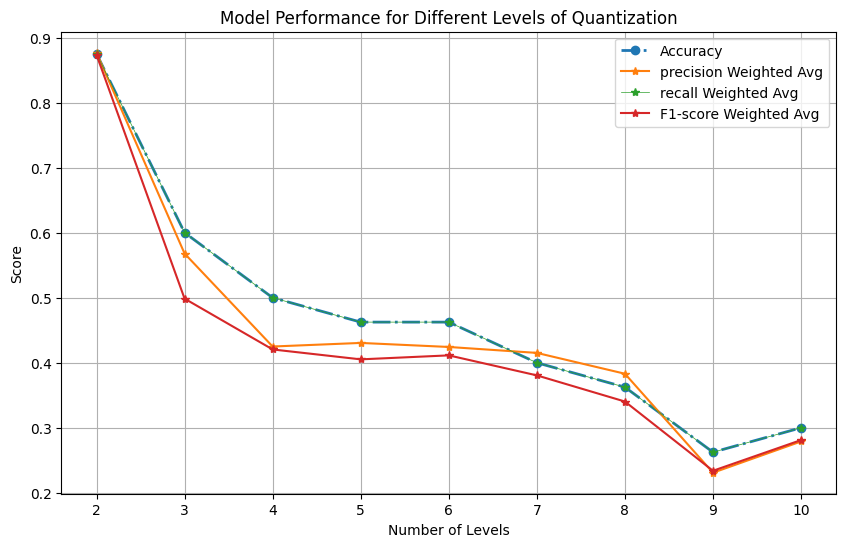

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

plt.figure(figsize=(10, 6))
print(accuracy_score_list)
plt.plot(list(range(2, 11)), accuracy_score_list, marker='o',linestyle='-.', linewidth=2, label='Accuracy')
plt.plot(list(range(2, 11)), precision_score_list, marker='*', label='precision Weighted Avg')
plt.plot(list(range(2, 11)), recall_score_list, marker='*', linestyle='-', linewidth=0.5, label='recall Weighted Avg')
plt.plot(list(range(2, 11)), f1_score_list, marker='*', label='F1-score Weighted Avg ')

plt.title('Model Performance for Different Levels of Quantization')
plt.xlabel('Number of Levels')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.show()

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [3]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving adult.csv to adult.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 122MB/s]
Archive:  /content/adult-income-dataset.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Task:** Determine the number of null entries!

In [2]:
# Your code goes here!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch


data_frame = pd.read_csv('adult.csv' , na_values='?')
print("null entries :",data_frame.isnull().sum().sum())
data_frame

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

Handling Missing Data:

**Deletion Strategy:** A simple approach, deletion means removing rows or columns with null entries. While it's an easy solution, it can have drawbacks. Deleting data without careful consideration may result in losing important insights, especially if the null values are scattered or if they make up a large part of the dataset. Use deletion when null entries are few or when their effect on the analysis is small.

**Imputation Techniques:** Imputation provides various methods to replace missing values with estimated ones. Common imputation strategies include:

**Mean Imputation:** Replacing null values with the average of the feature.
**Median Imputation:** Replacing null entries with the middle value of the feature.
**Mode Imputation:** Filling in missing values with the most common value in the feature.
**User-Defined Constant:** Using a set value as a stand-in for missing data.
Imputation helps to keep data complete while reducing the effect of missing values. It's a good choice when dealing with a lot of missing data, as long as the replaced values can be reasonably guessed from the existing dataset.

**Prediction Methods:** Predictive techniques use machine learning algorithms to guess missing values based on the relationships seen within the dataset. This method includes:*

Regression: Using regression models to guess missing values based on other features.
K-Nearest Neighbors (KNN): Replacing missing values by taking the average of the nearest neighbors in the feature space.
Decision Trees: Using decision trees to guess missing values by splitting the dataset in different ways.
Prediction methods work well when missing data shows patterns that can be learned from other features. However, they need computer resources for model training and can make the imputation process more complex.

**Interpolation Strategies:** Interpolation techniques guess missing values by estimating between nearby data points. Different interpolation methods include:

Linear Interpolation: Guessing missing values based on straight-line relationships between nearby data points.
Spline Interpolation: Using piecewise polynomial functions to guess missing values.
Time-Series Interpolation: Using special methods like linear or seasonal interpolation for time-series datasets.
Interpolation works well for sequential or time-series data, where missing values follow a predictable trend or pattern.

**Flagging Approach:** Flagging adds an extra binary indicator variable to show the presence or absence of missing values. This method lets the model learn the importance of missingness as a separate feature. Flagging is useful when the lack of data itself gives valuable information for the analysis or prediction task.

**Multiple Imputation:** Multiple imputation creates multiple filled-in datasets, each with different replaced values, and then combines the results to make a final guess. This technique considers uncertainty in replaced values and gives more reliable guesses compared to single imputation methods.

**Domain-Specific Imputation:** Adjusting imputation methods to the specific features of the dataset or domain can improve imputation accuracy. For example, in healthcare data, replacing missing values based on medical knowledge or expert guidelines may give more meaningful results.

By understanding the details of these methods and choosing the right approach based on the dataset and the goals of the analysis, practitioners can effectively handle the problems caused by missing data.

**Task:** Handle null entries using your best method.

In [ ]:
# Your code goes here!


# Fill NA values in numeric columns with their mean
numeric_cols = data_frame.select_dtypes(include=[np.number]).columns
data_frame[numeric_cols] = data_frame[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Loop over non-numeric features
for i in range (0,len(data_frame.columns[data_frame.dtypes == 'object'])) :
    # Get the most common value in the current feature
    most_common_value = data_frame[data_frame.columns[data_frame.dtypes == 'object'][i]].value_counts().idxmax()

    # Fill NA values in the current feature with its most common value
    data_frame[data_frame.columns[data_frame.dtypes == 'object'][i]].fillna(value=most_common_value, inplace=True)

    # Move to the next feature
    i = i + 1

# Count remaining NA values in the dataset
remaining_na = data_frame.isna().values.sum()

# Print remaining null entries
print("number of null entries remaining: ", remaining_na)


number of null entries remaining:  0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [42]:
# Your code goes here!

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report



data_frame = pd.read_csv('adult.csv')

for i in range (0,len(data_frame.columns)) :
    if (data_frame.columns[i] != "income" and data_frame[data_frame.columns[i]].dtype == type(object)):
      data_frame[data_frame.columns[i]] = LabelEncoder().fit_transform(data_frame[data_frame.columns[i]])

    # Proceed to next column
    i = i + 1

def income_to_numeric(income):
    if income == '<=50K':
        return 0
    else:
        return 1

# Divide dataset into train and test sets
X = data_frame.drop('income', axis=1)
y = data_frame['income'].apply(income_to_numeric)

# y = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
training_features, testing_features, training_labels, testing_labels = train_test_split(X, y, test_size=0.2, random_state=20)

# Standardize the data using the training set
scaler = StandardScaler()
training_features = scaler.fit_transform(training_features)
testing_features = scaler.transform(testing_features)

# Set the parameter grid for GridSearchCV
param_grid = [{'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300]},
              {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300]}]

# Train the model using Logistic Regression and GridSearchCV
classifier = GridSearchCV(LogisticRegression(), param_grid)
classifier.fit(training_features, training_labels)

# Display the best parameters, and train and test accuracy of the optimal model
print("Optimal parameter is : ", classifier.best_params_)
print("Train accuracy is: ", classifier.score(training_features, training_labels))
print("Test accuracy is: ", classifier.score(testing_features, testing_labels))



Optimal parameter is :  {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Train accuracy is:  0.8258644076472245
Test accuracy is:  0.8199406285187839


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [1]:
# Your code goes here!

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from scipy import stats


# Divide X_train into 10 segments
training_features_list = np.array_split(training_features, 10)
training_labels_list = np.array_split(training_labels, 10)

# Create 10 distinct Logistic Regression models
models = []
for i in range(0,10):
    model_clone = HandmadeLogisticRegression()
    model_clone.fit_model(training_features_list[i], training_labels_list[i].to_numpy())  # convert Series to numpy array
    models.append(model_clone)

# Ensemble technique 1: Majority vote
predictions_majority_voting = []
for model in models:
    predictions_majority_voting.append(model.predict_values(testing_features))
predictions_majority_voting = stats.mode(np.array(predictions_majority_voting))[0][0]

# Ensemble technique 2: Mean probabilities
predictions_average_probabilities = sum(model.predict_probability(testing_features) for model in models) / i
predictions_average_probabilities = (predictions_average_probabilities > 0.5).float().cpu().numpy()

# Ensemble technique 3: Weighted probabilities
weights = []
for i in range(0,10):
  weights.append(1 / (i + 1))
y_pred_proba_ensemble = np.average([model.predict_probability(testing_features) for model in models], axis=0, weights=weights)
if y_pred_proba_ensemble.ndim <= 1:
  probs = y_pred_proba_ensemble
else:
  probs = y_pred_proba_ensemble[:, 1]

predictions_weighted_probabilities = [1] * len(probs)
for i, prob in enumerate(probs):
    if prob <= 0.5:
        predictions_weighted_probabilities[i] = 0
    else:
        predictions_weighted_probabilities[i] = 1

# Display test accuracies
print("Majority Voting Accuracy: ", np.mean(predictions_majority_voting == testing_labels))
print("Weighted Averaging Accuracy: ", np.mean(predictions_average_probabilities == testing_labels))
print("Simple Averaging Accuracy: ", np.mean(predictions_weighted_probabilities == testing_labels))


NameError: name 'training_features' is not defined

**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

In this code, we initially partition X_train and y_train into 10 equal segments and then educate them with 10 distinct Logistic regression models. Subsequently, we employ three different ensemble techniques which I will elucidate briefly below:

**Majority Voting:** This technique necessitates each model in the ensemble to cast a vote for the class label, and then the class label that secures the most votes is picked as the final prediction. This technique is uncomplicated and often effective, as it can neutralize individual errors committed by each model. However, it presumes that all models are equally proficient, which may not always hold true.

**Average Probabilities:** This technique involves computing the mean predicted probabilities of each class for each model, and then electing the class with the highest average probability as the final prediction. This technique can be more potent than majority voting when the models' confidence in their predictions is significant. It also presumes that all models are equally proficient.

**Weighted Probabilities:** This technique is akin to averaging probabilities, but it assigns more significance to the predictions of some models than others. In this case, the weights are inversely proportional to the model's index, so earlier models carry more weight. This technique can be more potent when some models are known or anticipated to be more accurate than others.

These techniques were chosen because they are simple, comprehensible, and often potent ways to amalgamate the predictions of multiple models. They can aid in enhancing prediction accuracy by leveraging the strengths of multiple models and mitigating their weaknesses.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Best i: 83
Train accuracy of the best model: 0.8203618867248483
Test accuracy of the best model: 0.8160507728529021


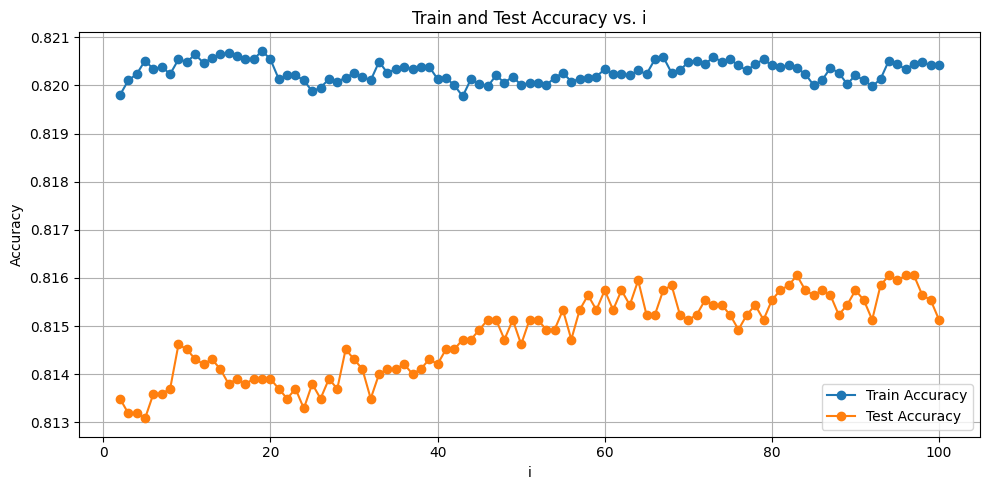

In [58]:
def calculate_accuracy(X, y, models, weights):
    # Compute weighted probabilities
    y_pred_proba_ensemble = np.average([model.predict_probability(X) for model in models], axis=0, weights=weights)

    # Classify based on probability
    predictions = [1 if prob > 0.5 else 0 for prob in (y_pred_proba_ensemble[:, 1] if y_pred_proba_ensemble.ndim > 1 else y_pred_proba_ensemble)]

    y_pred_proba_ensemble = np.average([model.predict_probability(testing_features) for model in models], axis=0, weights=weights)
    if y_pred_proba_ensemble.ndim <= 1:
      probs = y_pred_proba_ensemble
    else:
      probs = y_pred_proba_ensemble[:, 1]

    predictions_weighted_probabilities = [1] * len(probs)
    for i, prob in enumerate(probs):
        if prob <= 0.5:
            predictions_weighted_probabilities[i] = 0


    # Compute accuracy
    accuracy = np.mean(predictions == y)

    return accuracy

# Start lists for accuracies
train_accuracies = []
test_accuracies = []

# Loop over the range of 2 to 100
for i in range(2, 101):
    # Divide X_train into i segments
    training_features_list = np.array_split(training_features, i)
    training_labels_list = np.array_split(training_labels, i)

    # Train i distinct Logistic Regression models
    models = []
    for j in range(i):
        model_clone = HandmadeLogisticRegression()
        model_clone.fit_model(training_features_list[j], training_labels_list[j].to_numpy())  # convert Series to numpy array
        models.append(model_clone)

    # Compute weights
    weights = []
    for i in range(0,10):
      weights.append(1 / (i + 1))
    # Compute train and test accuracy
    train_accuracy = calculate_accuracy(training_features, training_labels, models, weights)
    test_accuracy = calculate_accuracy(testing_features, testing_labels, models, weights)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Identify the best model
best_i = np.argmax(test_accuracies) + 2
best_train_accuracy = train_accuracies[best_i - 2]
best_test_accuracy = test_accuracies[best_i - 2]

print(f"Optimal i: {best_i}")
print(f"Training accuracy of the optimal model: {best_train_accuracy}")
print(f"Testing accuracy of the optimal model: {best_test_accuracy}")

# Define range for plotting
range = range(2, 100 + 1)
# Plot training and testing accuracy for each i
plt.figure(figsize=(12, 6))
plt.plot(range, train_accuracies, label='Training Accuracy', marker='*')
plt.plot(range, test_accuracies, label='Testing Accuracy', marker='*')
plt.xlabel('i')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. i')
plt.grid(True)
plt.legend()
plt.show()


**Question:** Analyze the results.

**Your Answer:**